## 1. Samples, Outcomes and Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Mimic the roll dice game

In [3]:
# roll two dice for multiple times
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]   # replace means draw the same sample values many times is possible
print('Sum of dice is', sum_of_dice)
# you may get different outcomes as we now mimic the result of rolling 2 dice, but the range must be limited between 2 and 12. 

Sum of dice is 7


### 1.2 Mimic the roll dice game for multiple times

In [5]:
# The following code mimics the roll dice game for 50 times. And the results are all stored into "Result"
# Lets try and get the results of 50 sum of faces.
trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
#print the first 10 results
print(result[:10])

[3, 4, 6, 3, 6, 8, 5, 10, 6, 7]


## 2. Frequency and Distribution

In [14]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 100
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

# This is the code for summarizing the results of sum of faces by frequency
freq = pd.DataFrame(results)[0].value_counts()         # value_counts is only used for Indextype
#freq = pd.Index(results).value_counts()               # an alternative way
sort_freq = freq.sort_index()

print(results)
print(sort_freq)

[3, 8, 3, 4, 9, 11, 4, 4, 7, 10, 6, 7, 7, 10, 6, 2, 6, 7, 2, 7, 7, 4, 7, 10, 8, 5, 3, 5, 7, 8, 7, 4, 9, 4, 8, 5, 5, 12, 7, 7, 5, 9, 8, 12, 6, 9, 8, 3, 9, 6, 10, 8, 5, 6, 10, 9, 12, 8, 9, 9, 3, 6, 9, 7, 9, 7, 7, 4, 5, 8, 11, 7, 8, 7, 10, 7, 2, 9, 7, 5, 8, 10, 6, 7, 5, 10, 5, 10, 6, 7, 2, 6, 7, 9, 7, 10, 7, 6, 5, 7]
2      4
3      5
4      7
5     11
6     11
7     24
8     11
9     12
10    10
11     2
12     3
Name: 0, dtype: int64


## 3. Relative Frequency

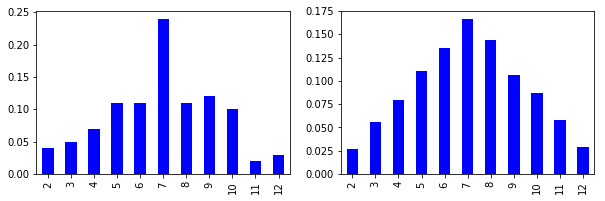

In [15]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
plt.subplot(1,2,1)
relative_freq.plot(kind='bar', color='blue', figsize=(10, 3))

# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()         # value_counts is only used for Indextype
#freq = pd.Index(results).value_counts()               # an alternative way
sort_freq = freq.sort_index()

relative_freq = sort_freq/trial
plt.subplot(1,2,2)
relative_freq.plot(kind='bar', color='blue', figsize=(10, 3))

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

## 4. Expectation and Variance of a distribution

In [7]:
#### 1. assume that we have fair dice, which means all faces will be shown with equal probability
X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36

mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print('From assumed fair dices,', mean, var)

#### 2. Random roll two dices, if we calculate mean and variance of outcomes (with high enough number of trials, eg 10000)...
trial = 15000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

#print the mean and variance of the trails
results = pd.Series(results)
print('From drawing two dices,', results.mean(), results.var())

From assumed fair dices, 6.999999999999998 5.833333333333333
From drawing two dices, 6.986533333333333 5.83567436051278


## 5. Models of Stock Return

In [11]:
ms = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/microsoft.csv',index_col ='Date') # index is date
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


### 5.1 Distribution of Log return

0.0008202314861230223 0.014191897388737506


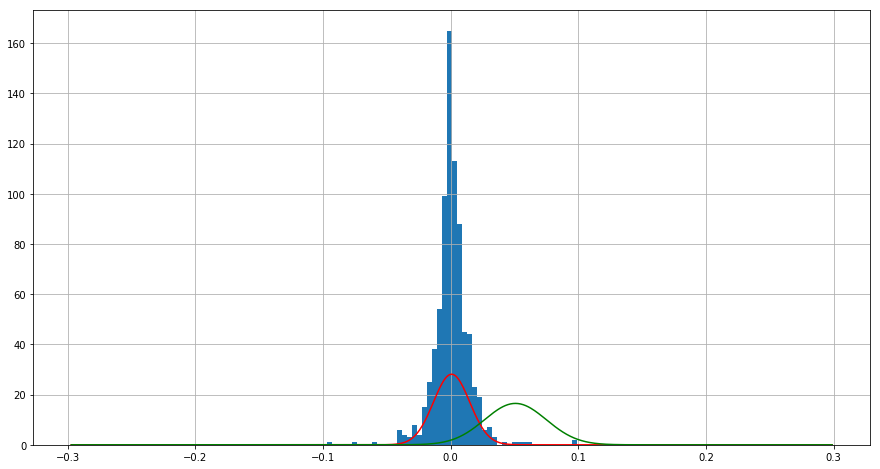

In [24]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)
print(mu, sigma)

density = pd.DataFrame()                                                                # the area under the pdf is 1
density['x'] = np.arange(ms['LogReturn'].min()-0.2, ms['LogReturn'].max()+0.2, 0.001)   # input data series as x-axis
density['pdf'] = norm.pdf(density['x'], mu, sigma)                                      # compute the pdf of the series as y-axis 

density1 = pd.DataFrame()                                                               # create another series for comparison
density1['x'] = np.arange(ms['LogReturn'].min()-0.2, ms['LogReturn'].max()+0.2, 0.001)  # x-axis
density1['pdf'] = norm.pdf(density1['x'], mu+0.05, sigma+0.01)                          # shift mu & sigma, get another norm-distr.

ms['LogReturn'].hist(bins=50, figsize=(15, 8))

plt.plot(density['x'], density['pdf'], color='red')
plt.plot(density1['x'], density1['pdf'], color='green')
plt.show()

### 5.2 Calculate the probability of the stock price will drop over a certain percentage in a day

In [14]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)    # cdf = F(x) = P(X<=x), drop over 5% is equivalent to return rate <= -0.05
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


Text(0, 0.5, 'prob_return')

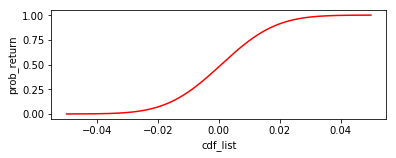

In [43]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
cdf_list = np.arange(-0.05, 0.05, 0.00001)
prob_return = norm.cdf(cdf_list, mu, sigma)
plt.figure(figsize=(6,2))
plt.plot(cdf_list, prob_return, color='red')
plt.xlabel('cdf_list')
plt.ylabel('prob_return')

### 5.3 Calculate the probability of the stock price will drop over a certain percentage in a year

In [18]:
# drop over 40% in 220 days
# the mean for 220 days
mu220 = 220*mu       
# the var for 220 days
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


### 5.4 Calculate Value at risk (VaR)

Single day value at risk  -0.022523362407065
corresponding quartile 0.049999999999999975


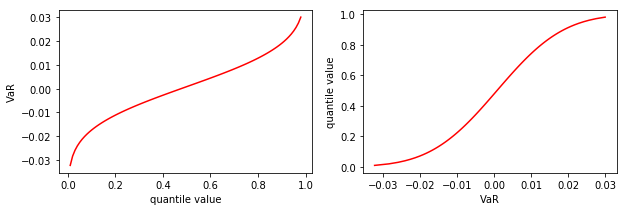

In [41]:
# Value at risk(VaR)                          # how much a set of investment might be lost, given a 5% chance. 
VaR = norm.ppf(0.05, mu, sigma)               # percent point function (ppf) is the inverse of the cdf.
print('Single day value at risk ', VaR)       # VaR at the level of 95%. 5% chance return will be worse than VaR, -0.022.

quatile = norm.cdf(VaR, mu, sigma)            # cdf(VaR) = P(L<=VaR )= quatiles = 1-c, c is confident interval of 95% 
print('corresponding quartile', quatile)      # in the 2nd subplot, P(L>VaR) = c

# visualize the VaR                              
quantile_list = np.arange(0.01, 0.99, 0.01)      
VaR_list = norm.ppf(quantile_list, mu, sigma)    

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(quantile_list, VaR_list, color='red')
plt.xlabel('quantile value')
plt.ylabel('VaR')

plt.subplot(1,2,2)
plt.plot(VaR_list, quantile_list, color='red')
plt.ylabel('quantile value')
plt.xlabel('VaR')
plt.show()

In [9]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))   # 5% quartile = VaR level
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))   

5% quantile  inf
95% quantile  0.0241638253793


In [6]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.00875205783841
75% quantile  0.0103925208107


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107